<a href="https://colab.research.google.com/github/Malaika-05/AI-Training/blob/main/Week03_02_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 01

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df = df.drop(columns=["CustomerID"])

In [8]:
# 3️⃣ Select only numerical behavior features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

In [9]:
print("\nSelected Features:")
print(X.head())


Selected Features:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 5️⃣ Convert back to DataFrame (for easy viewing)
X_scaled = pd.DataFrame(X_scaled, columns=features)

print("\nScaled Data (first 5 rows):")
print(X_scaled.head())


Scaled Data (first 5 rows):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


Step 02

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [16]:
print("Inertia:", kmeans.inertia_)
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)


Inertia: 295.4562449213557
Silhouette Score: 0.3579234303882264


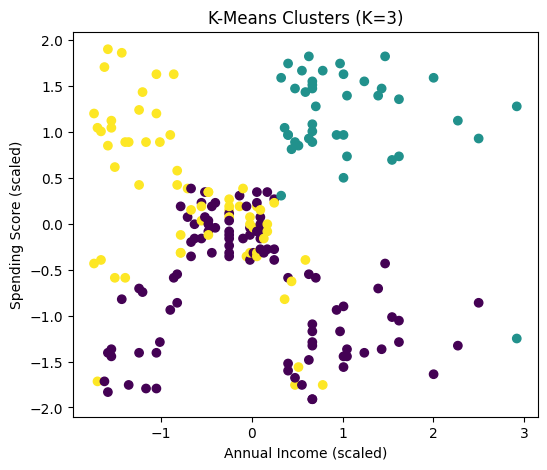

In [17]:
plt.figure(figsize=(6,5))

plt.scatter(
    X_scaled["Annual Income (k$)"],
    X_scaled["Spending Score (1-100)"],
    c=labels
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clusters (K=3)")

plt.show()

Step 03

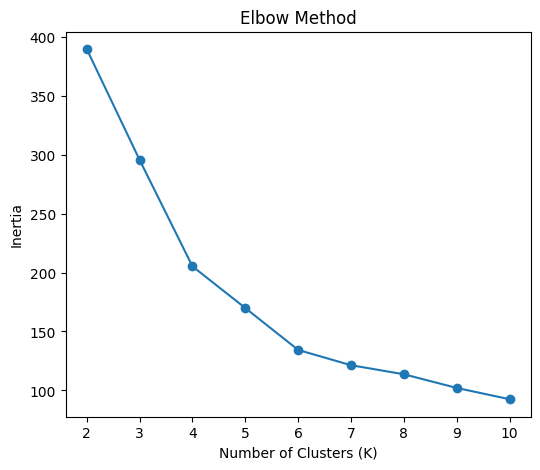

In [19]:
# Elbow method
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

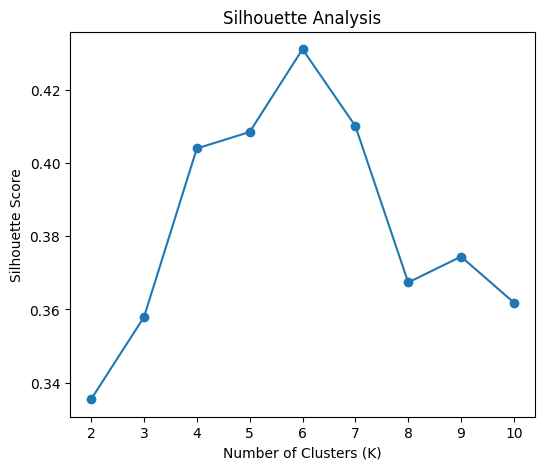

Scores for each K:
K=2  Score=0.335
K=3  Score=0.358
K=4  Score=0.404
K=5  Score=0.408
K=6  Score=0.431
K=7  Score=0.41
K=8  Score=0.367
K=9  Score=0.374
K=10  Score=0.362


In [21]:
# Silhouette Score
sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(6,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

print("Scores for each K:")
for k, s in zip(K_range, sil_scores):
    print(f"K={k}  Score={round(s,3)}")

In [22]:
best_k = 5   # change based on your plot
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
print("Final Inertia:", kmeans.inertia_)
print("Final Silhouette:", silhouette_score(X_scaled, labels))


Final Inertia: 169.89149793438568
Final Silhouette: 0.40846873777345605


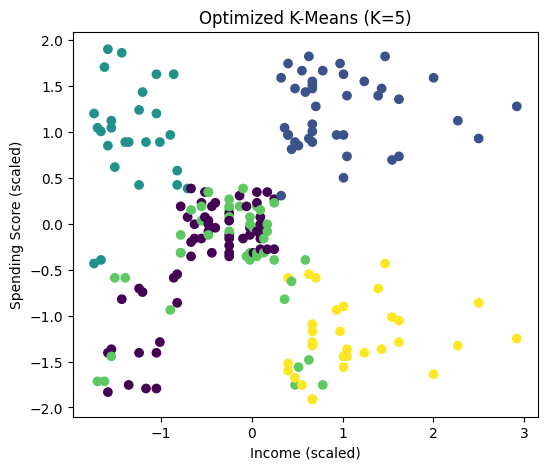

In [23]:
plt.figure(figsize=(6,5))
plt.scatter(
    X_scaled["Annual Income (k$)"],
    X_scaled["Spending Score (1-100)"],
    c=labels
)

plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"Optimized K-Means (K={best_k})")
plt.show()

Step 04

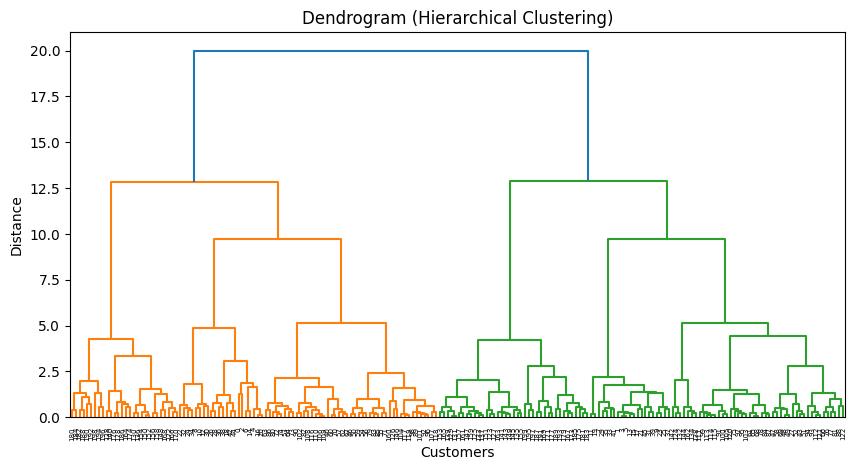

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,5))

linked = linkage(X_scaled, method='ward')

dendrogram(linked)

plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Distance")

plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=6,      # from silhouette result
    linkage='ward'
)

labels_agg = agg.fit_predict(X_scaled)

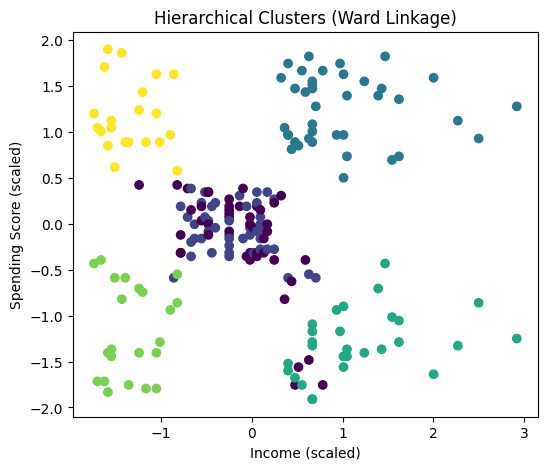

In [26]:
plt.figure(figsize=(6,5))

plt.scatter(
    X_scaled["Annual Income (k$)"],
    X_scaled["Spending Score (1-100)"],
    c=labels_agg
)

plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Hierarchical Clusters (Ward Linkage)")

plt.show()

In [27]:
from sklearn.metrics import silhouette_score

print("Hierarchical Silhouette:", silhouette_score(X_scaled, labels_agg))

Hierarchical Silhouette: 0.4201169558789579
